In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,recall_score ,accuracy_score,precision_score, roc_auc_score

In [37]:
df = pd.read_csv('/content/drive/MyDrive/BDDM UAS/Breast Cancer Dataset/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [39]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [40]:
df.drop(['id'],axis=1,inplace=True)
df.shape #col-=1

(569, 31)

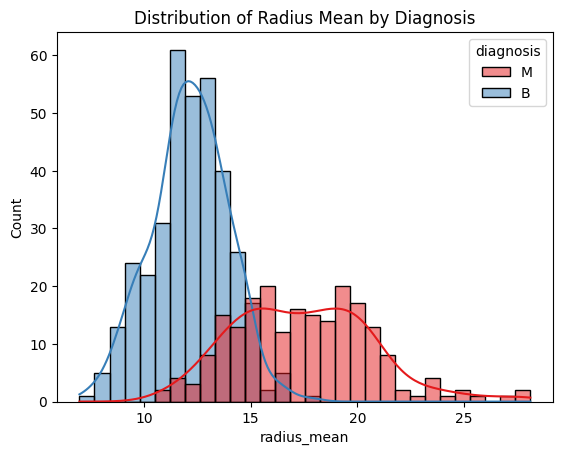

In [41]:
sns.histplot(data=df, x='radius_mean', hue='diagnosis', kde=True, palette='Set1', bins=30)
plt.title('Distribution of Radius Mean by Diagnosis')
plt.show()

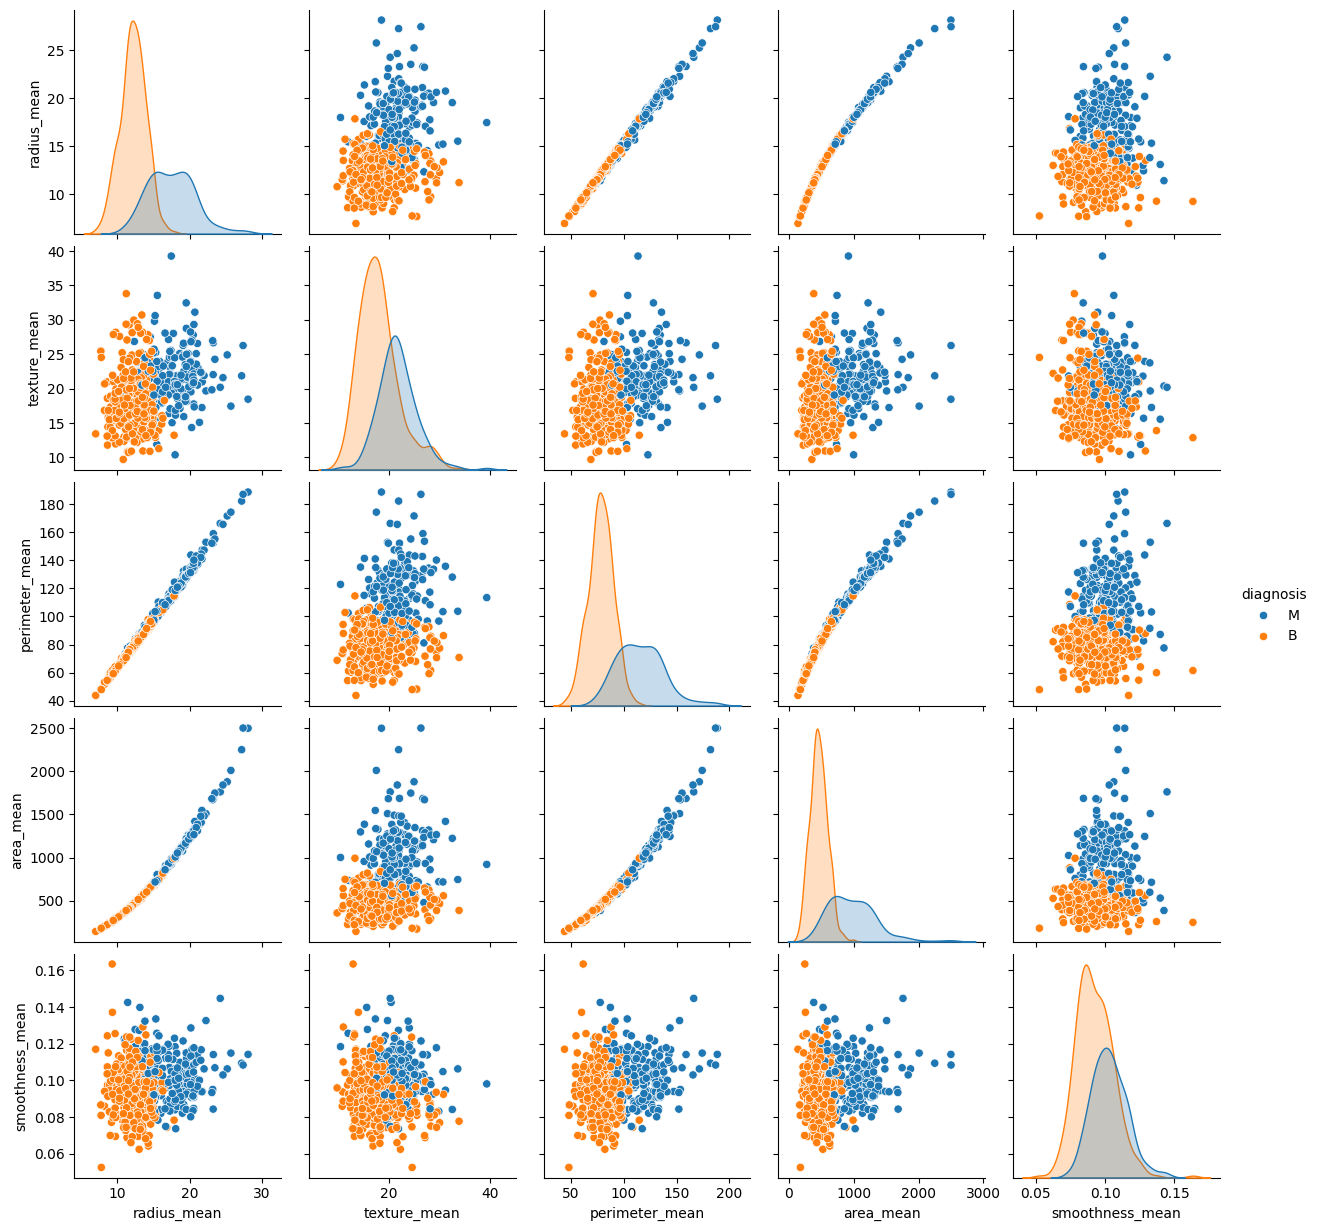

In [42]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis')
plt.show()

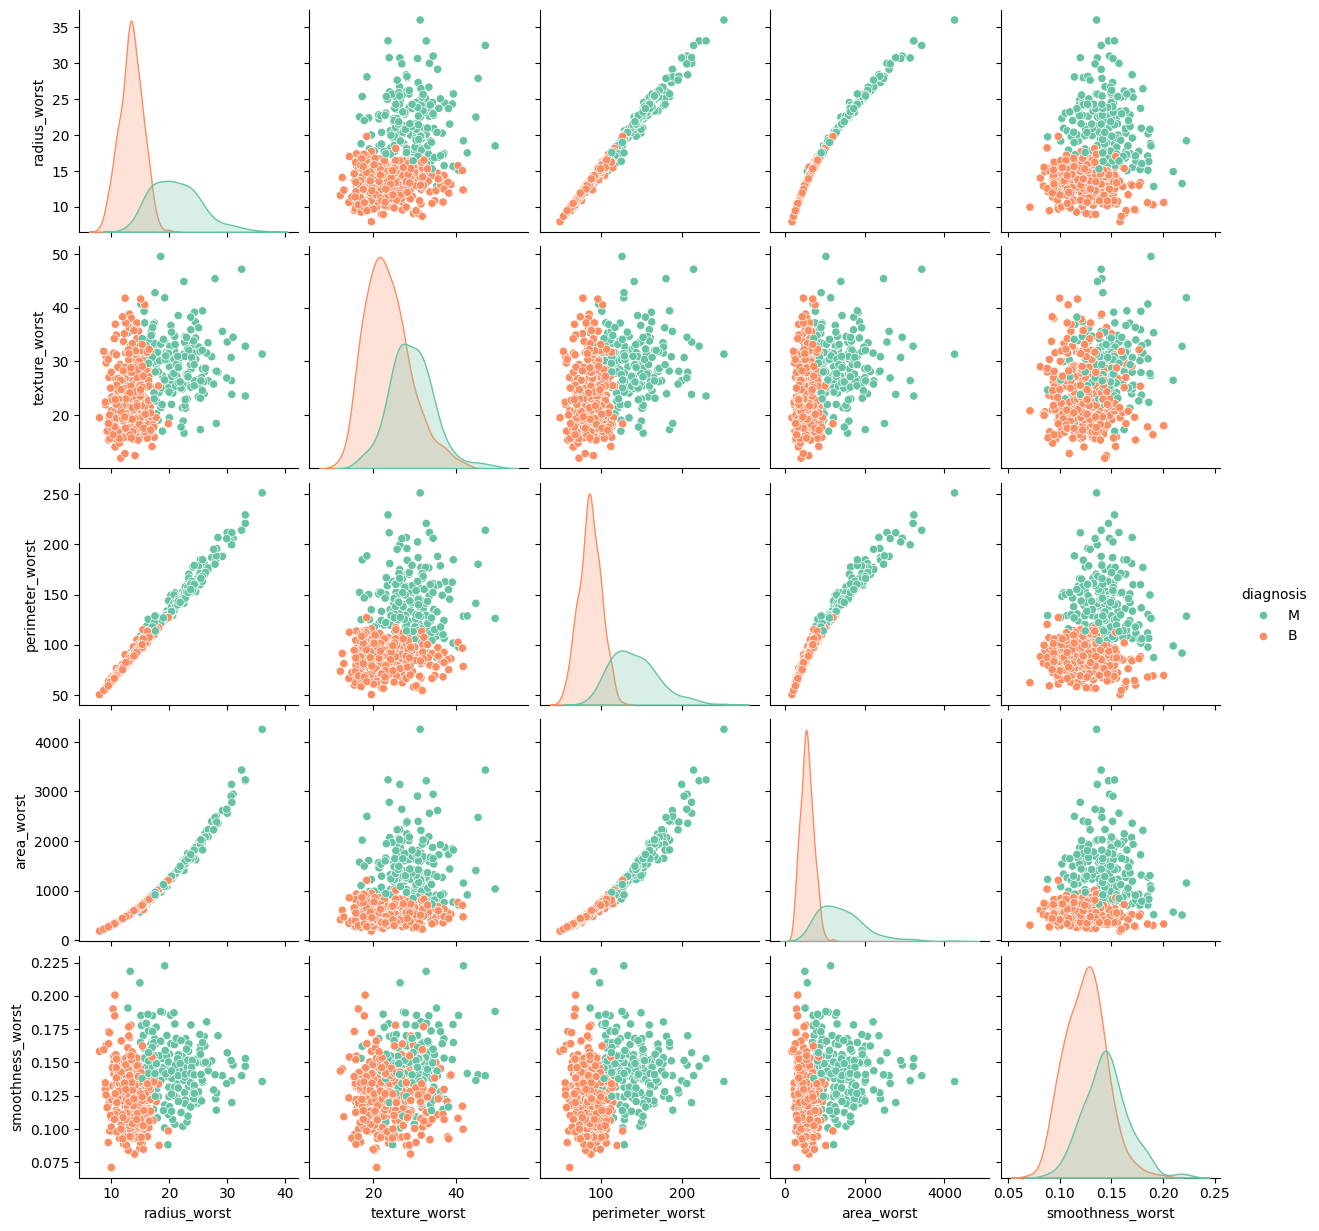

In [43]:
selected_features = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']
sns.pairplot(df[selected_features + ['diagnosis']], hue='diagnosis', palette='Set2')
plt.show()

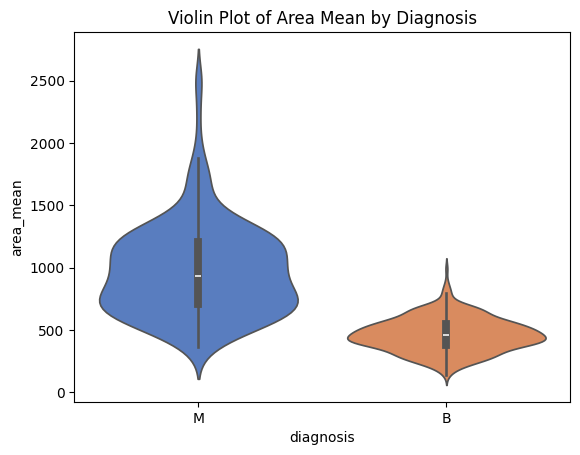

In [44]:
sns.violinplot(x='diagnosis', y='area_mean', data=df, palette='muted')
plt.title('Violin Plot of Area Mean by Diagnosis')
plt.show()

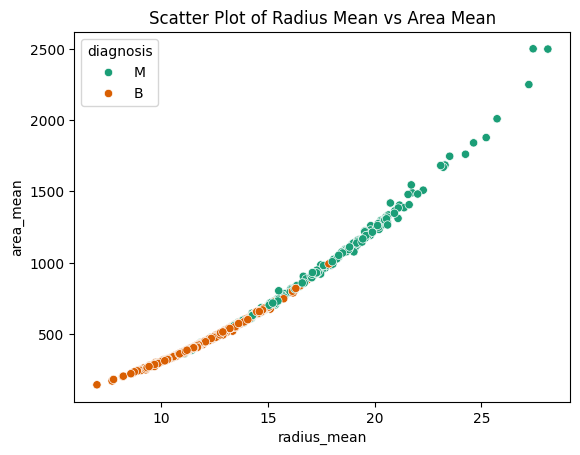

In [45]:
sns.scatterplot(data=df, x='radius_mean', y='area_mean', hue='diagnosis', palette='Dark2')
plt.title('Scatter Plot of Radius Mean vs Area Mean')
plt.show()

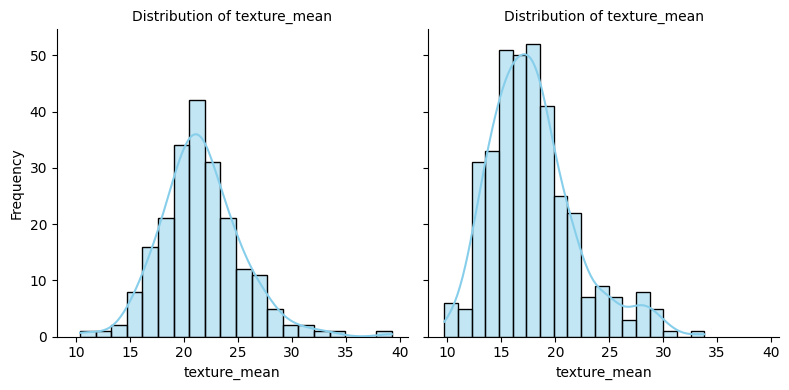

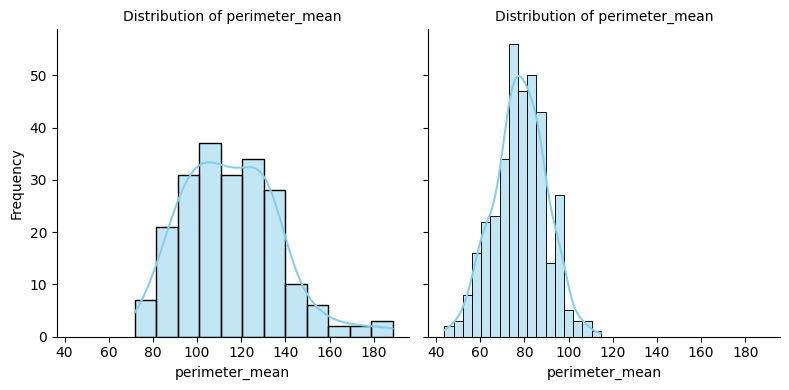

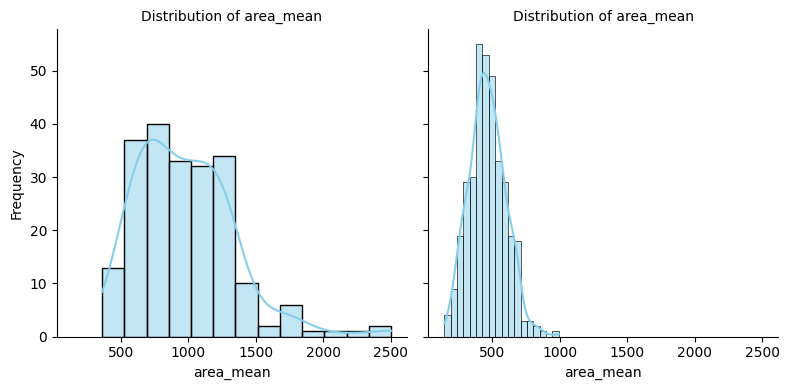

In [46]:
from seaborn import FacetGrid
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ['texture_mean', 'perimeter_mean', 'area_mean']

# Create FacetGrid for each feature
for feature in features:
    g = sns.FacetGrid(df, col='diagnosis', height=4, aspect=1)
    g.map(sns.histplot, feature, kde=True, color='skyblue')
    g.set_axis_labels(feature, 'Frequency')
    g.set_titles(f'Distribution of {feature}')
    plt.show()

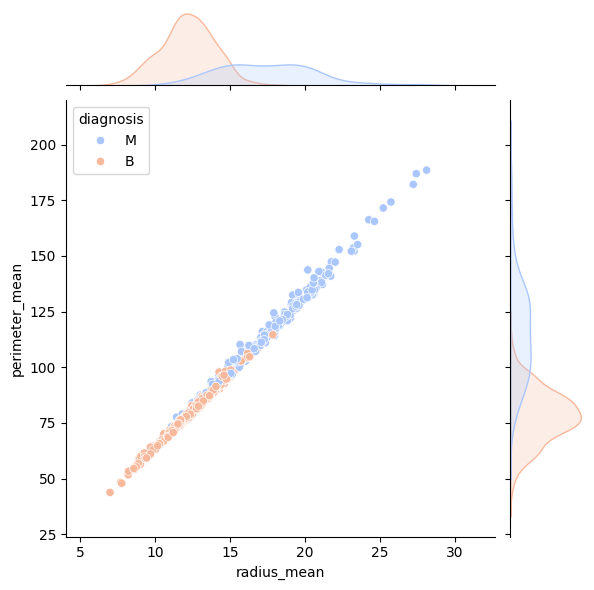

In [47]:
sns.jointplot(data=df, x='radius_mean', y='perimeter_mean', hue='diagnosis', kind='scatter', palette='coolwarm')
plt.show()

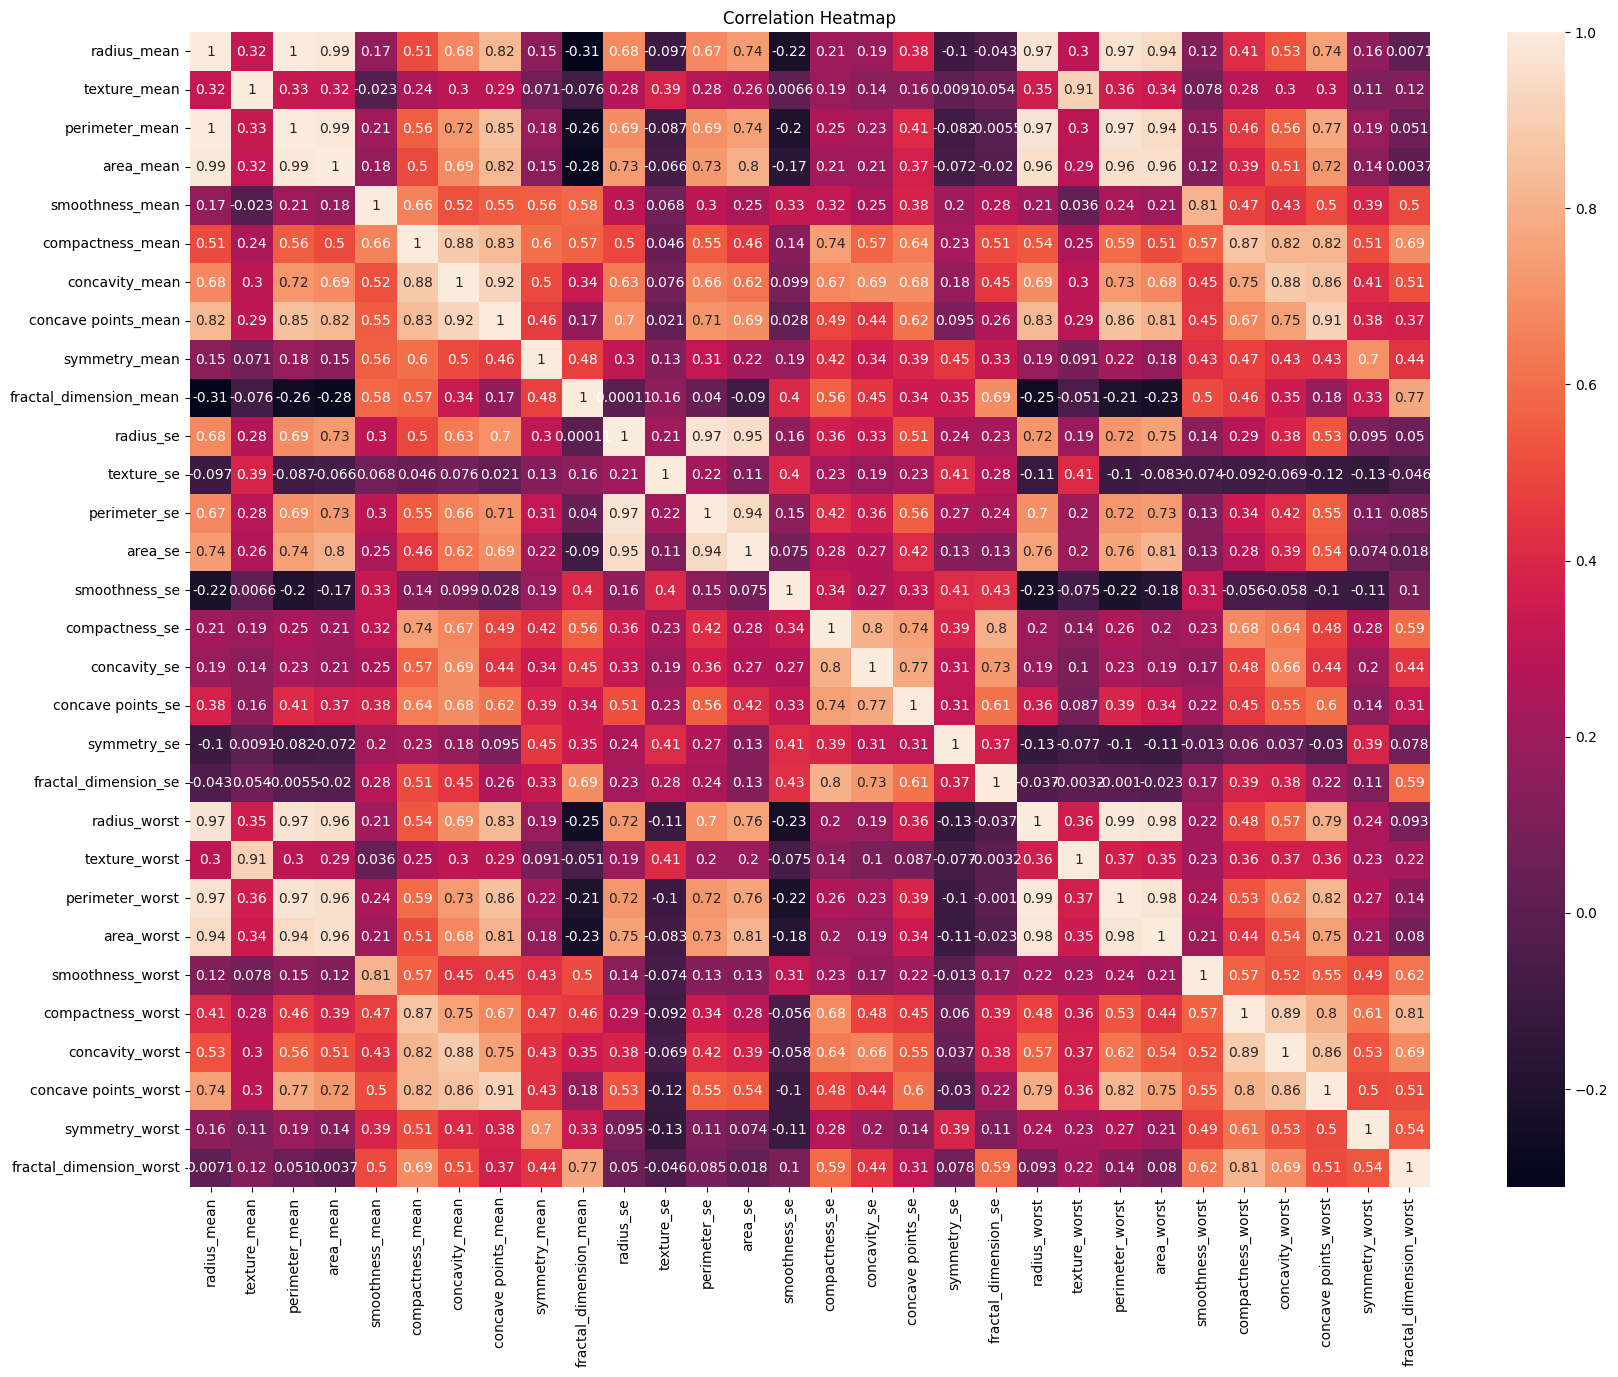

In [48]:
import numpy as np
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numerical_df.corr()  # Exclude non-numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [49]:
numerical_df = df.select_dtypes(include=[np.number])
corr = numerical_df.corr()

# Convert correlation matrix to a readable format
corr_pairs = corr.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation'])
corr = corr_pairs.sort_values(by='Correlation', ascending=False)
corr

,Feature 1,Feature 2,Correlation
2,radius_mean,perimeter_mean,0.997855
622,radius_worst,perimeter_worst,0.993708
3,radius_mean,area_mean,0.987357
63,perimeter_mean,area_mean,0.986507
623,radius_worst,area_worst,0.984015
...,...,...,...
293,fractal_dimension_mean,area_worst,-0.231854
290,fractal_dimension_mean,radius_worst,-0.253691
69,perimeter_mean,fractal_dimension_mean,-0.261477
99,area_mean,fractal_dimension_mean,-0.283110


In [50]:
df.drop(['perimeter_mean','area_mean'],axis=1,inplace=True)
df.shape #col-=2

(569, 29)

In [51]:
df.drop(['perimeter_worst','area_worst'],axis=1,inplace=True)
df.shape

(569, 27)

In [52]:
df.drop(['perimeter_se','area_se'],axis=1,inplace=True)
df.shape #col-=2

(569, 25)

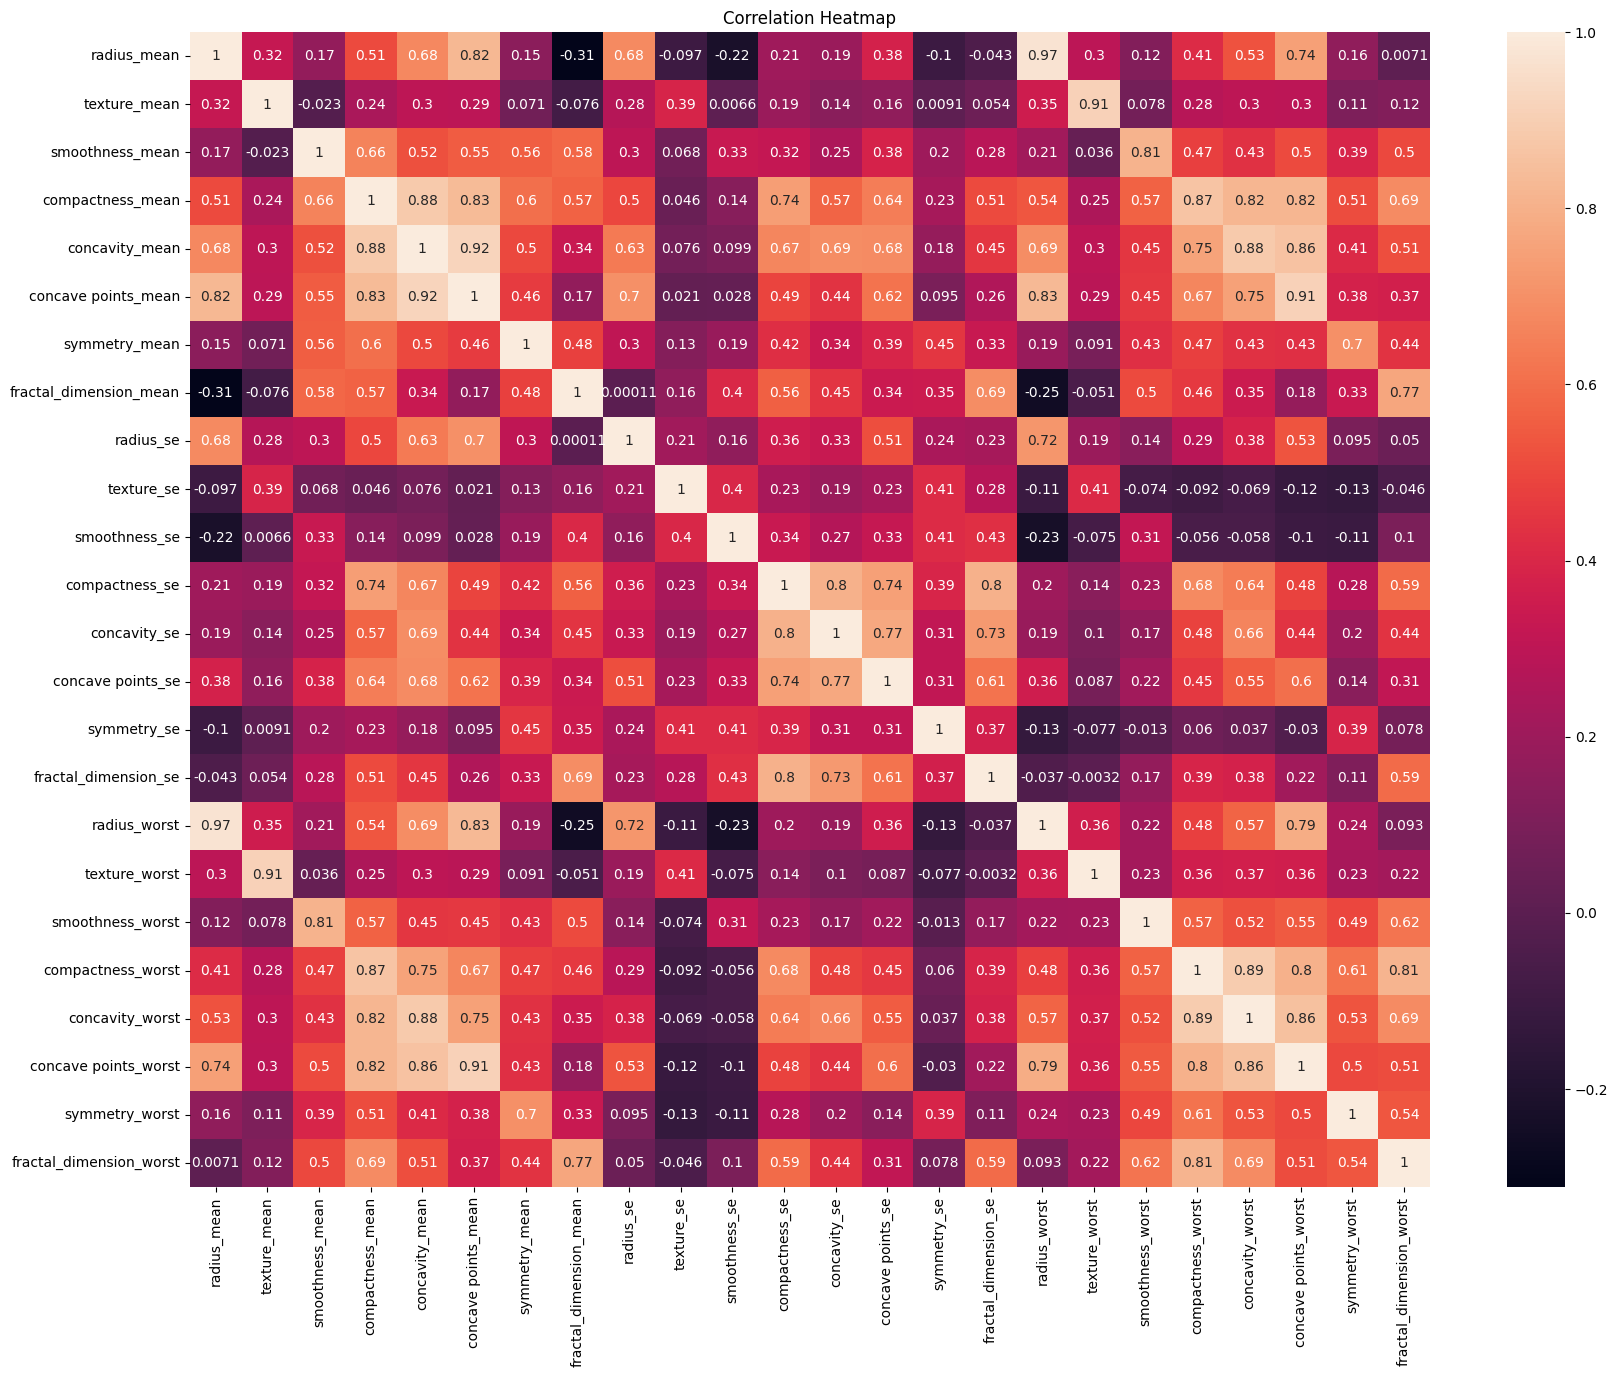

In [53]:
import numpy as np
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlations
corr = numerical_df.corr()  # Exclude non-numerical columns
plt.figure(figsize=(20, 15))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [54]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [55]:
print(corr['radius_mean']['radius_worst'])
print(corr['texture_mean']['texture_worst'])
print(corr['smoothness_mean']['smoothness_worst'])
print(corr['compactness_mean']['compactness_worst'])
print(corr['concavity_mean']['concavity_worst'])
print(corr['concave points_mean']['concave points_worst'])
print(corr['symmetry_mean']['symmetry_worst'])

0.9695389726112055
0.912044588840421
0.8053241954943627
0.8658090398022629
0.8841026390943817
0.9101553142985918
0.6998257976437302


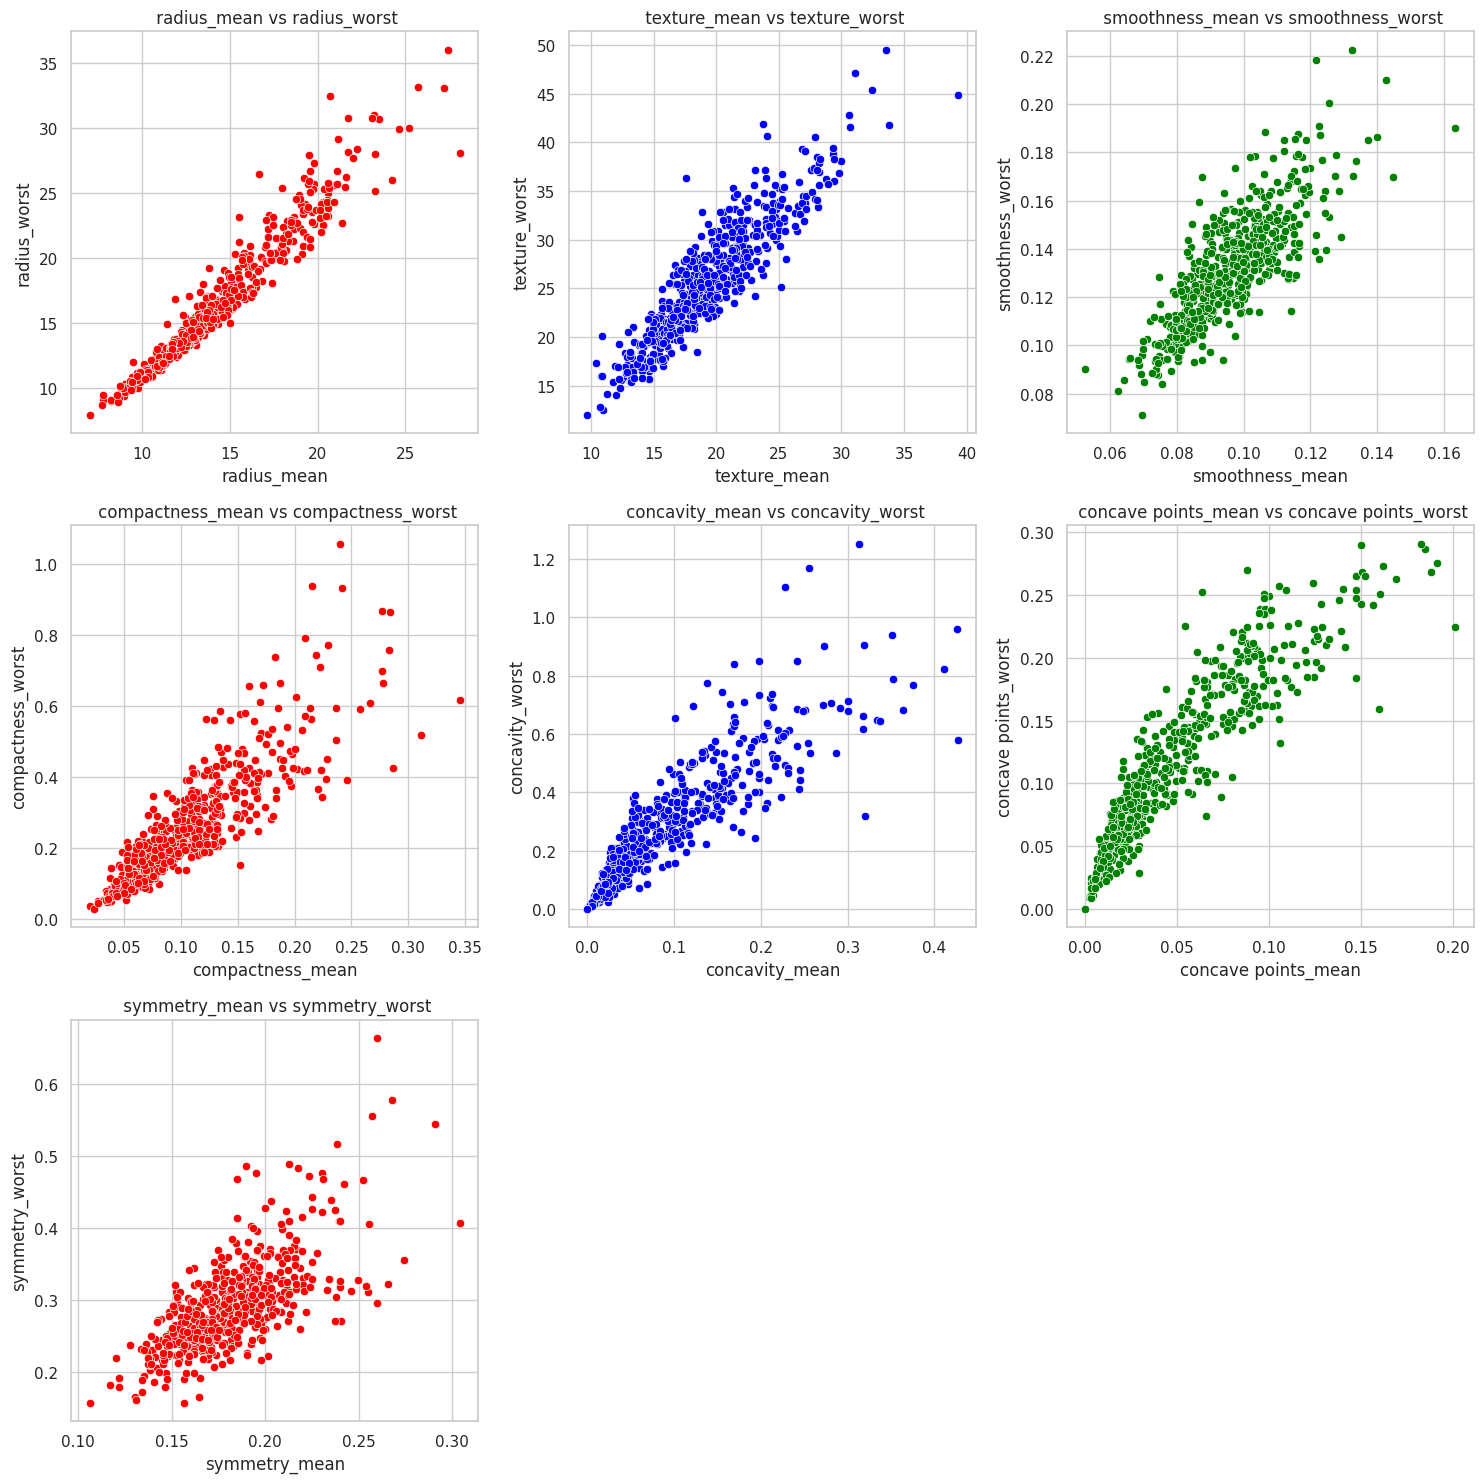

In [56]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# List of features for scatter plots
features = [
    ('radius_mean', 'radius_worst'),
    ('texture_mean', 'texture_worst'),
    ('smoothness_mean', 'smoothness_worst'),
    ('compactness_mean', 'compactness_worst'),
    ('concavity_mean', 'concavity_worst'),
    ('concave points_mean', 'concave points_worst'),
    ('symmetry_mean', 'symmetry_worst'),
]
colors = ['red', 'blue', 'green']

for i, (x_feature, y_feature) in enumerate(features):
    row, col = divmod(i, 3)
    sns.scatterplot(
        x=x_feature,
        y=y_feature,
        data=df,
        ax=axes[row, col],
        color=colors[i % len(colors)]  # Cycle through colors
    )
    axes[row, col].set_title(f' {x_feature} vs {y_feature}')
    axes[row, col].set_xlabel(x_feature)
    axes[row, col].set_ylabel(y_feature)

# Hide unused subplot (if any)
if len(features) < 9:
    for i in range(len(features), 9):
        row, col = divmod(i, 3)
        axes[row, col].axis('off')
plt.tight_layout()
plt.show()

In [57]:
df.drop(['radius_worst','concave points_mean','texture_worst','smoothness_worst','concavity_worst','compactness_mean'],axis=1,inplace=True)
df.shape

(569, 19)

In [58]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


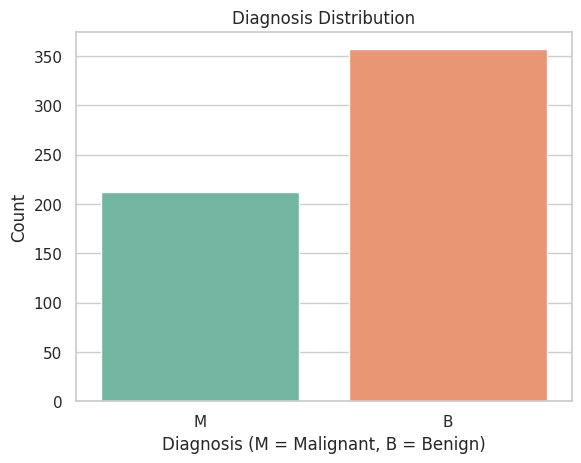

In [59]:
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

In [60]:
df['diagnosis']=df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis']

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [61]:
x =df.drop(columns=['diagnosis'])
y=df['diagnosis']

In [62]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
x,y = resampler.fit_resample(x,y)

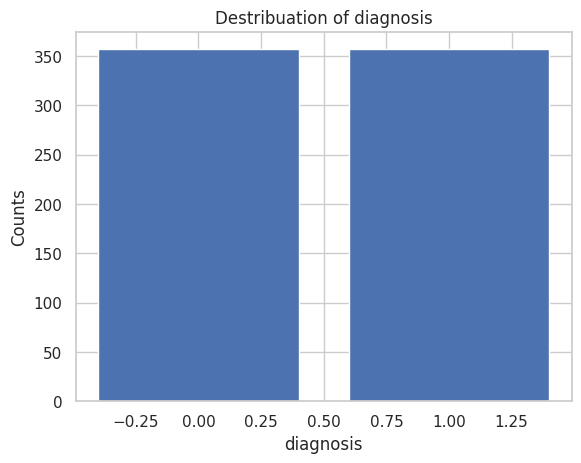

In [63]:
counts=y.value_counts()
plt.bar(counts.index,counts.values)
plt.title('Destribuation of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Counts')
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

X_scaled = sc.fit_transform(x)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(571, 18)
(571,)
(143, 18)
(143,)


In [67]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

In [68]:
final_res =[]

In [69]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

# Train the model
LR.fit(X_train, y_train)

LogisticRegression()

In [70]:
# Make predictions
y_pred_LR = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_LR)
final_res.append(accuracy)

In [71]:
evaluate_model(y_test,y_pred_LR)

Accuracy: 0.972027972027972
Precision: 0.9710144927536232
Recall: 0.9710144927536232
ROC AUC: 0.971993732863298


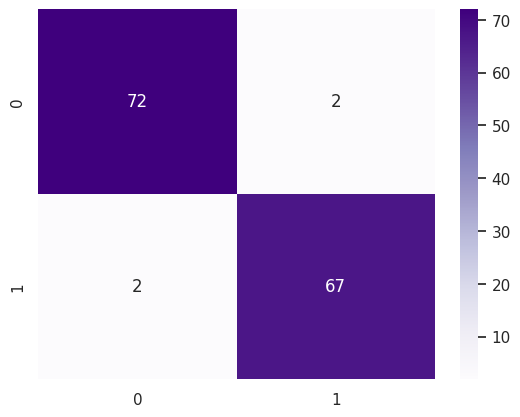

In [72]:
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.show()

In [88]:
final=np.array(final_res)
# Get the correct shape based on the length of final_res
rows = final.shape[0]
result=final.reshape(rows,1)
columns=['Accuracy']
index=['Logistic Regression', 'Other Model']
final_result=pd.DataFrame(result,index=index,columns=columns)

In [86]:
final_result

,Accuracy
Logistic Regression,0.972028
Other Model,0.951049
